In [1]:
import numpy as np
import pandas as pd
import GMCM_class as G

In [26]:
data = pd.read_csv("crab_age.csv")
data = data.iloc[0:500,:]
data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
495,495,I,0.5250,0.3750,0.1375,1.190679,0.481942,0.340194,0.425243,5
496,496,M,1.4000,1.0750,0.3625,24.380570,9.865626,5.641551,6.803880,11
497,497,M,1.5250,1.1875,0.3875,31.226974,13.749507,8.816695,9.638830,9
498,498,M,1.2500,0.9625,0.3250,27.541539,9.397859,6.775531,8.221355,10


In [30]:
data_size_vary = {}
runtime_collection = {}
data = pd.read_csv("crab_age.csv")
import GMCM_class as G
G = G.GaussianCopulaSynthesizer(data)
G._identify_columns()
G.convert_datetime_to_numerical()
G.handle_missing_values()
G.assign_intervals()
G.preprocess_data()
G.fit_distributions()
G.compute_gmm_cdf()
G.standard_gaussian_all()
for i in range(5):
    G.generate_synthetic_data(((i+1)*2)*10000)
    synthetic = G.post_process()
    data_size_vary[str(((i+1)*2)*10000) + "rows data"] = synthetic
    runtime_collection[str(((i+1)*2)*10000) + "rows data runtime"] = G.get_execution_times_df()

100%|██████████| 100000/100000 [2:41:40<00:00, 10.31it/s] 


In [28]:
# data_sdv = data_size_vary['20000rows data']

<Axes: >

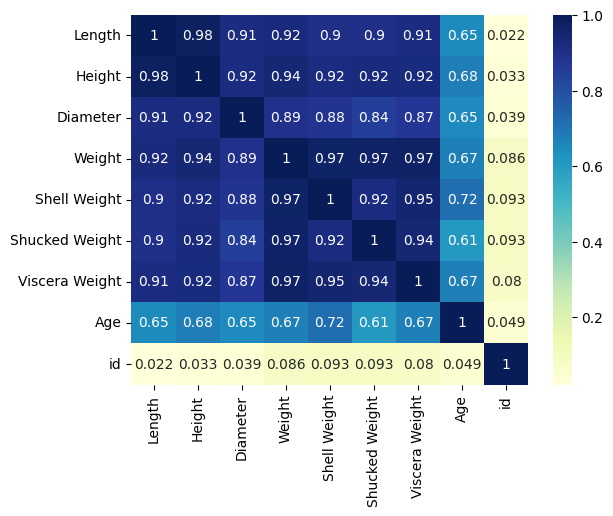

In [29]:
# import seaborn as sns
# numeric_cols = data_sdv.select_dtypes(include=np.number).columns.tolist()
# corr_matrix_sdv = data_sdv[numeric_cols].corr()
# sns.heatmap(corr_matrix_sdv, annot=True, cmap='YlGnBu', cbar=True)

In [23]:
data = pd.read_csv('crab_age.csv')
data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# Loading real data
real_data = pd.read_csv("crab_age.csv")
real_data.drop(["id"], axis=1, inplace=True)

# Extract target column and input columns from real data
target_column = 'Age'
input_columns = real_data.drop(columns=[target_column]).columns.tolist()

input_columns = list(real_data.select_dtypes(include=np.number).columns.tolist()) + list(real_data.select_dtypes(exclude=np.number).columns.tolist())
input_columns = set(input_columns) - set(["Sex"])
input_columns = list(input_columns)

# Function for learning curve evaluation
def learning_curve_evaluation(data_sizes, real_data, target_column, input_columns):
    performance_metrics = []

    for size, synthetic_data in data_sizes.items():
        # Preprocessing
        X_synthetic = synthetic_data[input_columns]
        y_synthetic = synthetic_data[target_column]
        X_real = real_data[input_columns]
        y_real = real_data[target_column]
        scaler = MinMaxScaler()
        X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_synthetic[X_synthetic.select_dtypes(include=np.number).columns.tolist()])
        X_real[X_real.select_dtypes(include=np.number).columns.tolist()] = scaler.fit_transform(X_real[X_real.select_dtypes(include=np.number).columns.tolist()])

        encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

        encoder.fit(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        encoded_cols = encoder.get_feature_names_out()
        encoded_cols

        X_synthetic[encoded_cols] = encoder.transform(X_synthetic[X_synthetic.select_dtypes(exclude=np.number).columns.tolist()])
        X_real[encoded_cols] = encoder.transform(X_real[X_real.select_dtypes(exclude=np.number).columns.tolist()])

        # Train-test split for synthetic data
        X_train, X_val, y_train, y_val = train_test_split(X_synthetic, y_synthetic, test_size=0.1, random_state=42)

        # Model training and hyperparameter tuning
        rf = RandomForestRegressor(random_state=0)
        param_grid = {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [1, 3, 5, 7],
            'criterion': ['squared_error', 'poisson']
        }
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best model
        best_rf = grid_search.best_estimator_

        # Predictions and metrics
        y_pred = best_rf.predict(X_real)
        metrics = calculate_regression_metrics(y_real, y_pred)
        performance_metrics.append({'Data Size': size, **metrics})

    return pd.DataFrame(performance_metrics)

# Running the evaluation
learning_curve_results = learning_curve_evaluation(data_size_vary, real_data, target_column, input_columns)
learning_curve_results

,Data Size,MAE,MSE,RMSE,R-squared,MAPE
0,20000rows data,0.971685,0.958411,0.978985,0.904936,11.006251
1,40000rows data,0.960838,0.940510,0.969799,0.906711,10.871278
2,60000rows data,0.962861,0.944229,0.971714,0.906342,10.902074
3,80000rows data,0.961226,0.943197,0.971183,0.906445,10.866947
4,100000rows data,0.915617,0.890765,0.943804,0.911645,10.473751


In [32]:
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import matplotlib.pyplot as plt

fig = go.Figure()
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAE"], mode='lines+markers', name='MAE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MSE"], mode='lines+markers', name='MSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["RMSE"], mode='lines+markers', name='RMSE'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["R-squared"], mode='lines+markers', name='R-squared'))
fig.add_trace(go.Scatter(x=learning_curve_results["Data Size"], y=learning_curve_results["MAPE"], mode='lines+markers', name='MAPE'))


# Update plot layout
fig.update_layout(title='Performance Metrics across Different Data Sizes',
                  xaxis_title='Data Size',
                  yaxis_title='Metric Value',
                  legend_title='Metrics')

# Show plot
fig.show()

In [34]:
runtime_collection

{'20000rows data runtime':                 Process  Time (seconds)
 0     _identify_columns        0.017003
 1  handle_missing_value        0.002001
 2      assign_intervals        0.021004
 3       preprocess_data       55.626577
 4      fit_distribution       48.814416
 5           compute_cdf      508.481784
 6     standard_gaussian       43.242771
 7     generate_syn_data     1949.000210
 8          post_process       46.037819,
 '40000rows data runtime':                 Process  Time (seconds)
 0     _identify_columns        0.017003
 1  handle_missing_value        0.002001
 2      assign_intervals        0.021004
 3       preprocess_data       55.626577
 4      fit_distribution       48.814416
 5           compute_cdf      508.481784
 6     standard_gaussian       43.242771
 7     generate_syn_data     3892.060655
 8          post_process       92.162825,
 '60000rows data runtime':                 Process  Time (seconds)
 0     _identify_columns        0.017003
 1  handle_missing

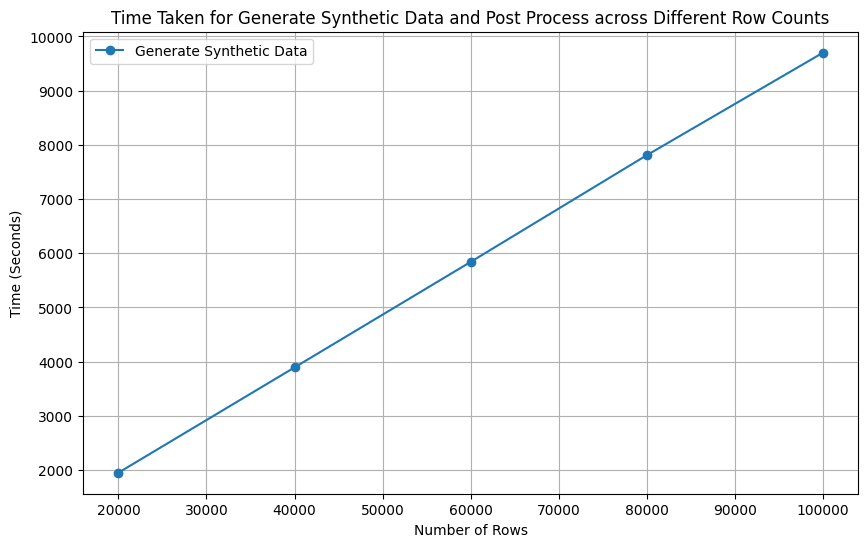

In [36]:
row_counts = [20000, 40000, 60000, 80000,100000]
generate_syn_data_times = []
post_process_times = []
preprocess_data_times = []

for key, value in runtime_collection.items():
    generate_syn_data_times.append(value['Time (seconds)'][7])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(row_counts, generate_syn_data_times, label='Generate Synthetic Data', marker='o')
# plt.plot(row_counts, post_process_times, label='Post Process', marker='x')
#plt.plot(row_counts, preprocess_data_times, label='Pre Process', marker='v')
plt.xlabel('Number of Rows')
plt.ylabel('Time (Seconds)')
plt.title('Time Taken for Generate Synthetic Data and Post Process across Different Row Counts')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
data_size_vary['20000rows data'].to_csv("20000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['40000rows data'].to_csv("40000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['60000rows data'].to_csv("60000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['80000rows data'].to_csv("80000_rows_crab_syn_gmcm.csv", index = False)

data_size_vary['100000rows data'].to_csv("100000_rows_crab_syn_gmcm.csv", index = False)
